In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
from Ska.Matplotlib import plot_cxctime
from Ska.engarchive import fetch as fetch
from Ska.tdb import msids as msids_

In [2]:
# Plotting methods

def plot_rt_pair(rt_list, color):
    """
    """
    fig = plt.figure(figsize=(12, 5))
    alphas = (0.8, 0.2)

    for i, key in enumerate(rt_list):
        msid = msids_set[key]
        dat = hrma_cap[msid]['data']
        technical_name = hrma_cap[msid]['technical_name']
        location = hrma_cap[msid]['location']
        label = f"{technical_name}, {location}"
        dat.plot('-', label=label, color=color, alpha=alphas[i])

    plt.xlabel('Time')
    plt.ylabel('Temperature')
    plt.legend()
    plt.grid(ls='dashed')
    
    
def plot_rt_difference(rt_list, color):
    """
    """
    fig = plt.figure(figsize=(12, 5))

    msids = [msids_set[rt] for rt in rt_list]
    dats = [hrma_cap[msid]['data'] for msid in msids]
    location = hrma_cap[msids[0]]['location']
    label = f'{rt_list[0]} - {rt_list[1]}'
    plot_cxctime(dats[0].times, dats[0].vals - dats[1].vals, color=color,
                 alpha=0.5, label=label)

    plt.xlabel('Time')
    plt.ylabel('Temperature difference')
    plt.legend()
    plt.grid(ls='dashed')

In [3]:
msids_.find('hrma cap')

[<MsidView msid="4OHRM08" technical_name="RT 103: HRMA CAP TEMP DELTA STATUS">,
 <MsidView msid="4OHRM09" technical_name="RT 105: HRMA CAP TEMP DELTA STATUS">,
 <MsidView msid="4OHRM31" technical_name="RT 101: HRMA CAP TEMP DELTA STATUS">,
 <MsidView msid="4OHRM33" technical_name="RT 102: HRMA CAP TEMP DELTA STATUS">,
 <MsidView msid="4OHRM52" technical_name="RT 100: HRMA CAP TEMP DELTA STATUS">,
 <MsidView msid="4OHRM53" technical_name="RT 104: HRMA CAP TEMP DELTA STATUS">,
 <MsidView msid="4OHRM54" technical_name="RT 106: HRMA CAP TEMP DELTA STATUS">,
 <MsidView msid="OHRTHR08" technical_name="RT 103: HRMA CAP">,
 <MsidView msid="OHRTHR09" technical_name="RT 105: HRMA CAP">,
 <MsidView msid="OHRTHR31" technical_name="RT 101: HRMA CAP">,
 <MsidView msid="OHRTHR33" technical_name="RT 102: HRMA CAP">,
 <MsidView msid="OHRTHR52" technical_name="RT 100: HRMA CAP">,
 <MsidView msid="OHRTHR53" technical_name="RT 104: HRMA CAP">,
 <MsidView msid="OHRTHR54" technical_name="RT 106: HRMA CAP">,

<img src='rt_info.png'>

<img src='IMG-2157.JPG'>

## Fetch data ##

In [4]:
msids_set = {'RT 104': 'ohrthr53', 'RT 101': 'ohrthr31',
             'RT 105': 'ohrthr09', 'RT 102': 'ohrthr33',
             'RT 106': 'ohrthr54', 'RT 103': 'ohrthr08',
             'RT 100': 'ohrthr52'}

locations = {'RT 104': 'AC Plane inner', 'RT 101': 'AC Plane outer',
             'RT 105': '-Z inner', 'RT 102': '-Z outer',
             'RT 106': '+Y/+Z inner', 'RT 103': '+Y/+Z outer',
             'RT 100': '-Y/+Z outer'}

# Fetch the data and interpolate on a common time axis

# stat, dt = None, 32.8  # 5 min samples, dt in sec
stat, dt = 'daily', 86400  # daily sample, dt in sec
dat = fetch.MSIDset(msids_set.values(), '2014:001', stat=stat)
dat.interpolate(dt=dt)
    
# Dictionary used to store the telemetry and location info
hrma_cap = {}
for msid in msids_set.values():
    hrma_cap[msid] = {}

for msid in msids_set.values():
    hrma_cap[msid]['data'] = dat[msid]
    technical_name = msids_.find(msid)[0].technical_name
    hrma_cap[msid]['technical_name'] = technical_name
    hrma_cap[msid]['location'] = locations[technical_name[:6]]

Content of the hrma_cap</code> dictionary:

In [5]:
hrma_cap.keys()

dict_keys(['ohrthr53', 'ohrthr31', 'ohrthr09', 'ohrthr33', 'ohrthr54', 'ohrthr08', 'ohrthr52'])

In [6]:
hrma_cap['ohrthr53'].keys()

dict_keys(['data', 'technical_name', 'location'])

In [7]:
hrma_cap['ohrthr53']['technical_name']

'RT 104: HRMA CAP'

In [8]:
hrma_cap['ohrthr53']['location']

'AC Plane inner'

In [9]:
hrma_cap['ohrthr53']['data'].times, hrma_cap['ohrthr53']['data'].vals

(array([  5.05051200e+08,   5.05137600e+08,   5.05224000e+08, ...,
          6.29380800e+08,   6.29467200e+08,   6.29553600e+08]),
 array([ 294.28387451,  294.27212524,  294.26782227, ...,  294.69497681,
         294.81481934,  294.84368896], dtype=float32))

## Plot pairs #

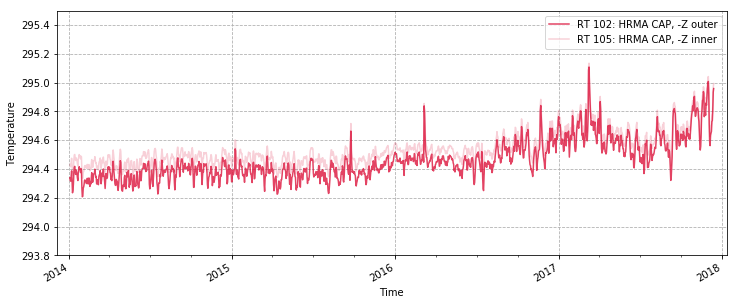

In [10]:
# Plot
plot_rt_pair(['RT 102', 'RT 105'], 'crimson')
plt.ylim(293.8, 295.5);

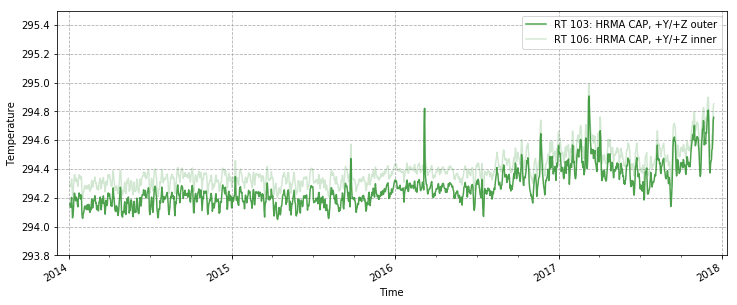

In [11]:
plot_rt_pair(['RT 103', 'RT 106'], 'forestgreen')
plt.ylim(293.8, 295.5);

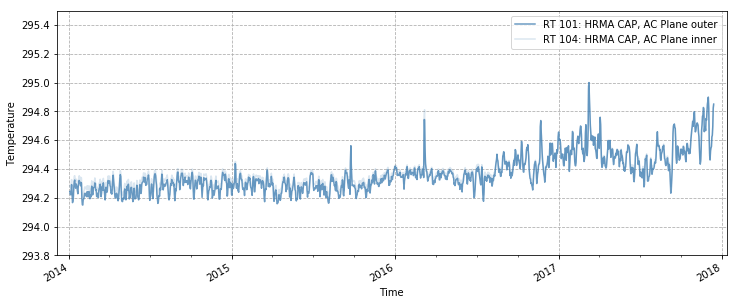

In [12]:
plot_rt_pair(['RT 101', 'RT 104'], 'steelblue')
plt.ylim(293.8, 295.5);

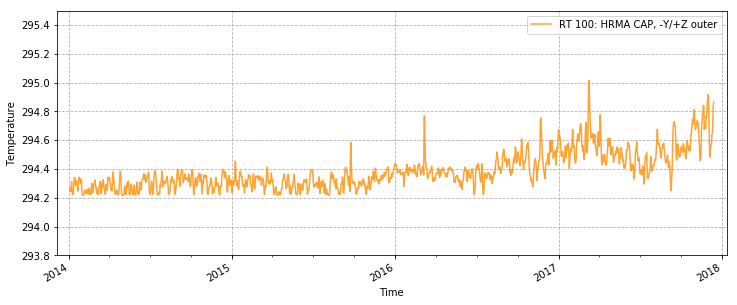

In [13]:
# Only one
plot_rt_pair(['RT 100'], 'darkorange')
plt.ylim(293.8, 295.5);

## Temperature differences, outer pairs ##

I am not sure what is the location of the AC Plane thermistors (they are not plotted in the diagram below) - RT 101 (OHRTHR31) and RT 104 (OHRTHR53). I see line marked as AC Plane in the image in Cell 3 but then it seems that the 101 and 104 thermistors are marked along the -Y axis.

<img src='rt_diagrams_outer.png' width='700px'>

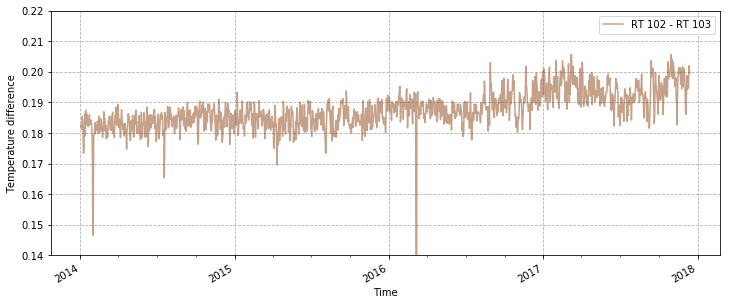

In [14]:
plot_rt_difference(['RT 102', 'RT 103'], color='saddlebrown')
plt.ylim(0.14, 0.22);

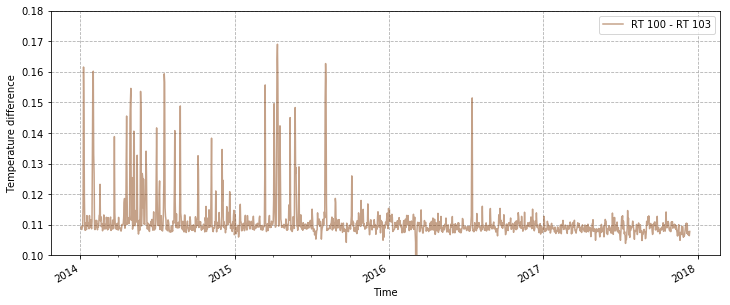

In [15]:
plot_rt_difference(['RT 100', 'RT 103'], color='saddlebrown')
plt.ylim(0.1, 0.18);

(0.02, 0.1)

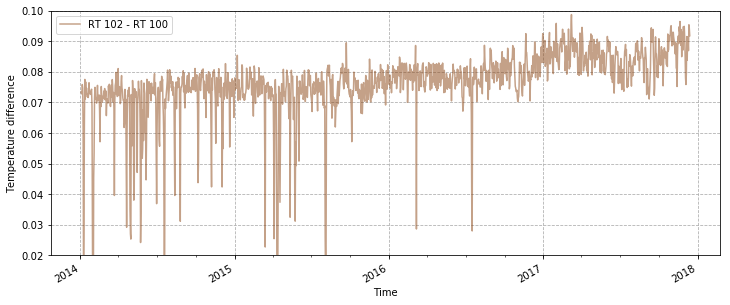

In [16]:
plot_rt_difference(['RT 102', 'RT 100'], color='saddlebrown')
plt.ylim(0.02, 0.1)

## Temperature differences, inner pairs ##

<img src='rt_diagrams_inner.png' width='700px'>

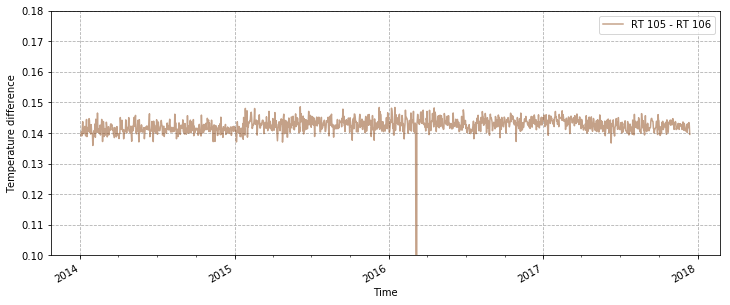

In [17]:
plot_rt_difference(['RT 105', 'RT 106'], color='saddlebrown')
plt.ylim(0.1, 0.18);

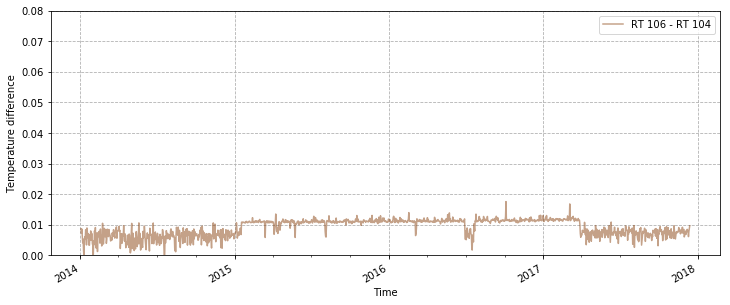

In [18]:
plot_rt_difference(['RT 106', 'RT 104'], color='saddlebrown')
plt.ylim(0.0, 0.08);

(0.1, 0.18)

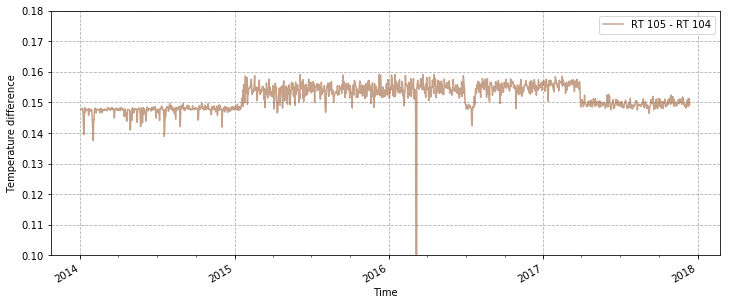

In [19]:
plot_rt_difference(['RT 105', 'RT 104'], color='saddlebrown')
plt.ylim(0.1, 0.18)